In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = pd.read_csv('Fraud_detection.csv')

df.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


In [4]:
# Explore the data
print("Dataset shape:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nSummary statistics:\n", df.describe())



Dataset shape: (1048575, 11)

Column names:
 Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Summary statistics:
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.048575e+06  1.048575e+06   1.048575e+06    1.048575e+06   
mean   2.696617e+01  1.586670e+05   8.740055e+05    8.938049e+05   
std    1.562325e+01  2.649409e+05   2.971725e+06    3.008246e+06   
min    1.000000e+00  1.000000e-01   0.000000e+00    0.000000e+00   
25%    1.500000e+01  1.214907e+04   0.000000e+00    0.000000e+00   
50%    2.000000e+01  7.634333e+04   1.600200e+04    0.000000e+00   
75%    3.900000e+01  2.137619e+05   1.366420e+05    1.746000e+05   
max    9.500000e+01  1.000000e+07   3.893942e+07    3.894623e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    1.048575e+06    1.048575e+06  1.048575e+06     

In [6]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())




Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [7]:
num_rows,num_columns= df.shape
print(f'Number of rows:{num_rows:,}')
print('Number of columns:',num_columns)

Number of rows:1,048,575
Number of columns: 11


In [8]:
df.duplicated(). sum()  

0

In [9]:
unique_types = df['type'].unique();
type_counts = df['type'].value_counts()

num_unique_types = len(unique_types)
print(type_counts)

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64


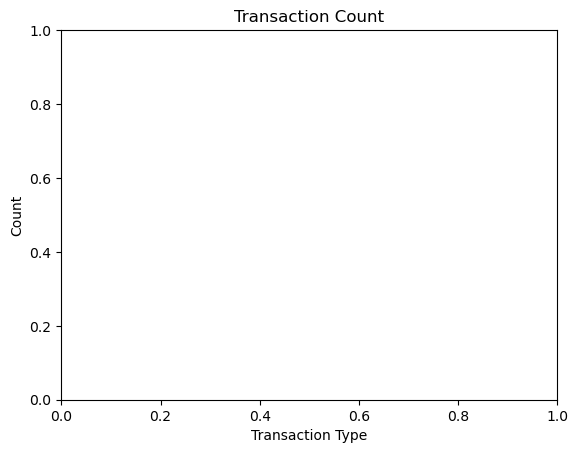

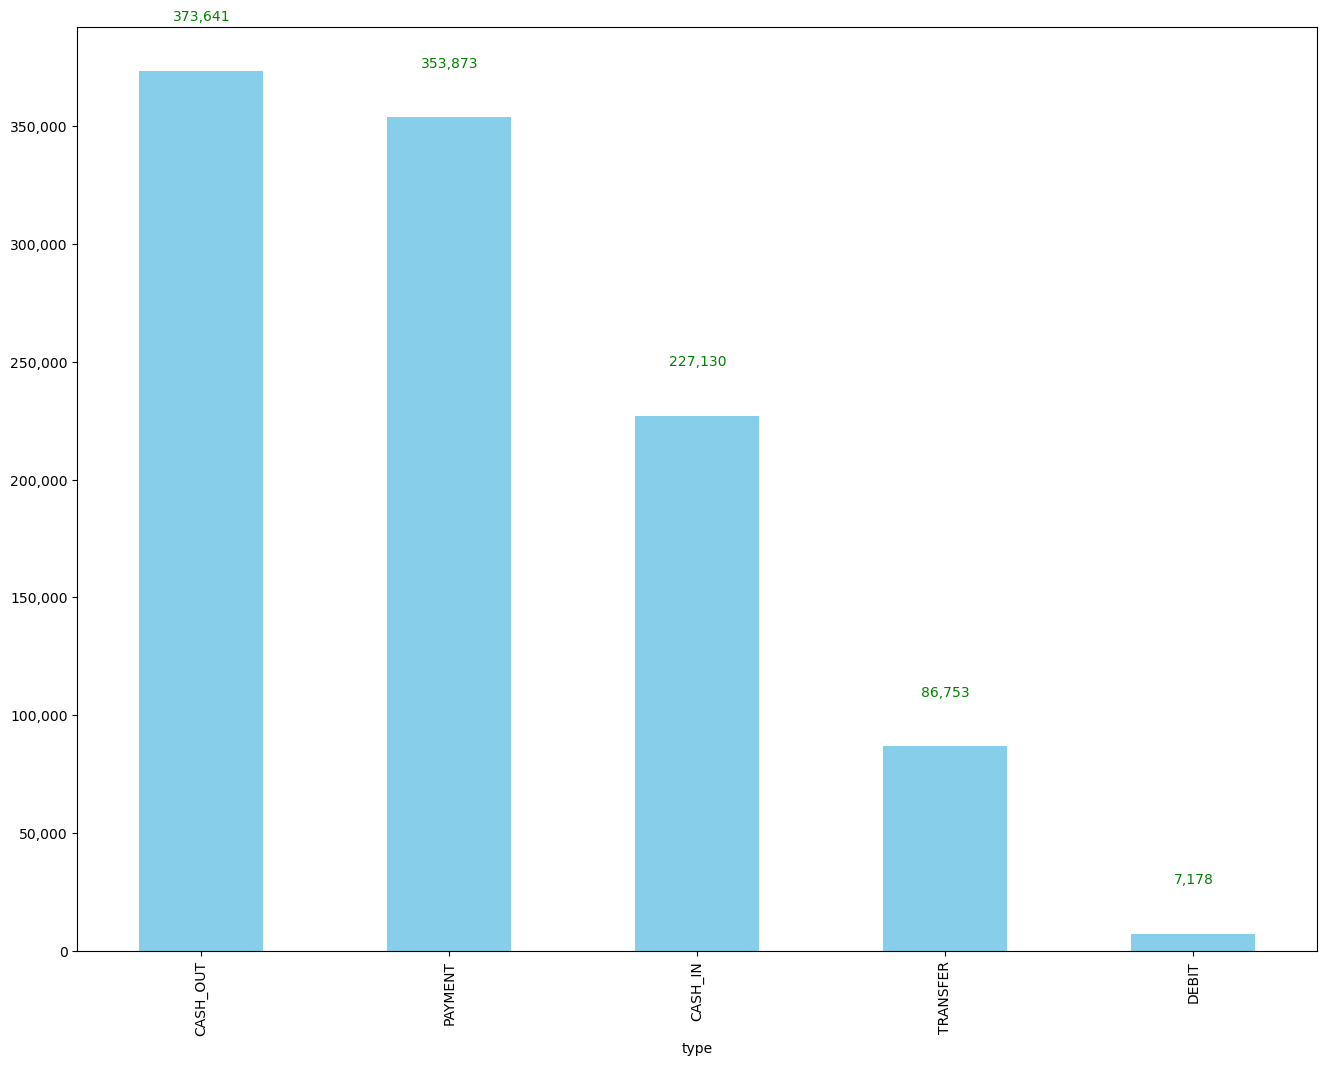

In [10]:
# above are a total of five type of transactions, dataset, has shown that cashout type of a transaction has the highest number of a transaction among all of the other types, payment type comes second cashin third transfer fourth and debit type pf a transaction comes fifth 
plt.title('Transaction Count')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.figure(figsize=(16,12))
bars= type_counts.plot(kind='bar', color='skyblue')

## label data on top of each bar
for bar in bars.patches:
    yval= bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2, yval+20000, f'{yval:,.0f}', ha ='center', va = 'bottom', fontsize= 10, color= 'green')

## format
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value,_:f'{value:,.0f}'))
plt.show()

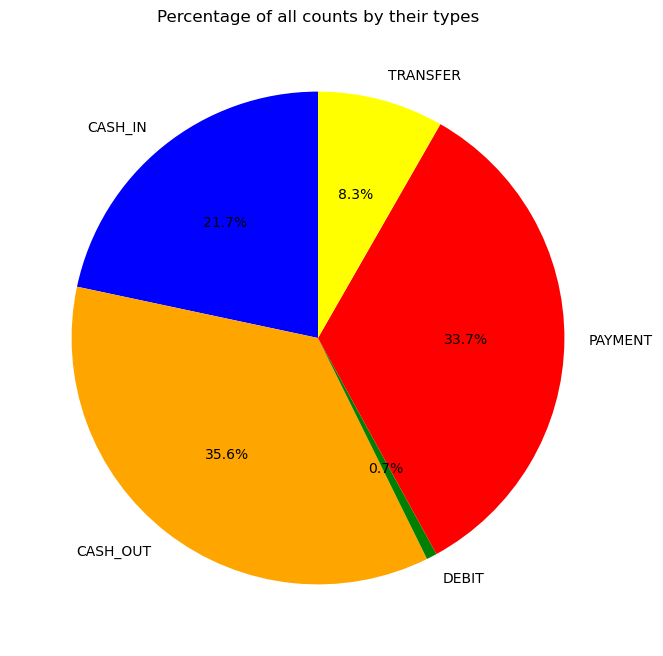

In [11]:
## group evey count by type
all_counts_by_type = df.groupby('type').size()
plt.figure(figsize=(10,8))
plt.title('Percentage of all counts by their types')
plt.pie(all_counts_by_type, labels= all_counts_by_type.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green', 'red', 'yellow'])
plt.show()

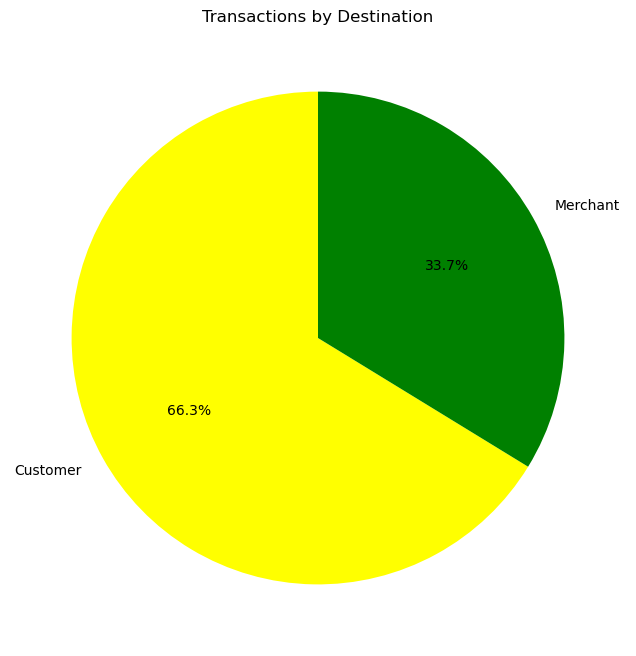

In [12]:
## visualise the percentage of transactions by destination, i will be converting or replacing the transaction destination column that consists of a mix of(numbers and letter) to only selecting the letter and give it a name ('M, Merchant)(C, Customer)
df_copy= df.copy();
df_copy['nameDest_first_letter']=df_copy['nameDest'].str[0]
df_copy['nameDest_first_letter']=df_copy['nameDest_first_letter'].replace('C','Customer')
df_copy['nameDest_first_letter']=df_copy['nameDest_first_letter'].replace('M','Merchant')
all_by_dest= df_copy.groupby('nameDest_first_letter').size()
plt.figure(figsize=(10,8))
plt.pie(all_by_dest,labels=all_by_dest.index, autopct='%1.1f%%', startangle=90, colors=['yellow','green'])
plt.title('Transactions by Destination')
plt.show()

In [14]:
## total count of fraud and non_fraud transactions
fraud_count= df[df['isFraud']==1]. shape[0]
non_fraud_count=df[df['isFraud']==0]. shape[0]

print(f'count of fraud transactions: {fraud_count:,.0f}')
print(f'count of non fraud total transactions: {non_fraud_count:,.0f}')


count of fraud transactions: 1,142
count of non fraud total transactions: 1,047,433


In [15]:
## totall of fraud and non-fraud transactions 
total_transactions= fraud_count + non_fraud_count

fraud_percentage = (fraud_count/ total_transactions)*100
non_fraud_percentage = (non_fraud_count/total_transactions)*100

print(f'fraud transactions percentage:{fraud_percentage:.2f}%')
print(f'non fraud transactions percentage: {non_fraud_percentage:.2f}%')

fraud transactions percentage:0.11%
non fraud transactions percentage: 99.89%


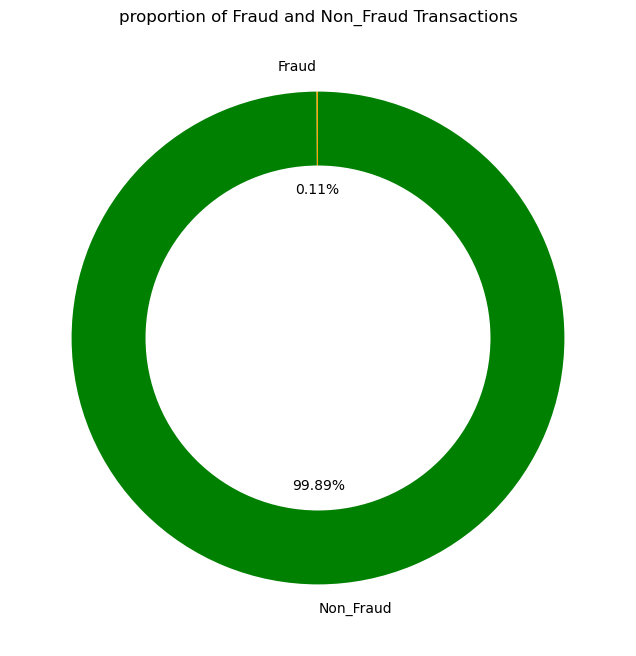

In [16]:
## visualise the percentage of the farud and non fraud transactions
labels = ['Fraud', 'Non_Fraud']
colors =['orange','green']
sizes = [fraud_percentage, non_fraud_percentage]


fig, ax= plt.subplots(figsize=(10,8))
ax.pie(sizes, labels=labels, autopct = '%1.2f%%', startangle = 90, colors=colors)
centre_circle= plt.Circle((0,0),0.70, fc= 'white')
fig.gca().add_artist(centre_circle)
plt.title('proportion of Fraud and Non_Fraud Transactions')
plt.show()

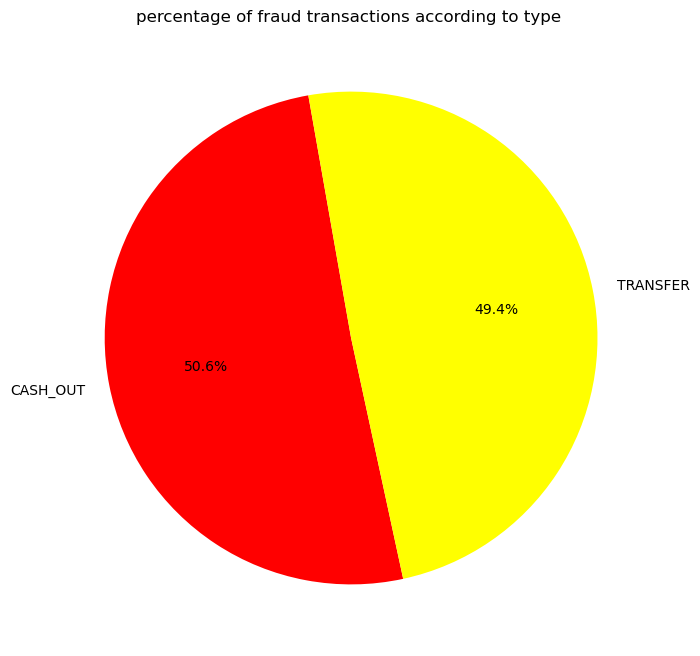

type
CASH_OUT    578
TRANSFER    564
dtype: int64


In [17]:
## after definingthe percentage of fraud and non_fraud transactions, the next step we will find the amount of fraud and non fraud transactions according to their types.
## below visual showed that bank transfer and cash_out transactions are more likely to be fraud than the other different transaction types (cash_in, Debit). 
fraud_transactions= df[df['isFraud']==1]
fraud_counts_by_type = fraud_transactions.groupby('type').size()

plt.figure(figsize=(10,8))
plt.title('percentage of fraud transactions according to type ')
plt.pie(fraud_counts_by_type, labels = fraud_counts_by_type.index, autopct='%1.1f%%', startangle=100, colors= ['red','yellow'])
plt.show()
print(fraud_counts_by_type)


In [18]:
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)
df_encoded.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [19]:
## Data Processing 
processesed_df= df_copy
## drop the IsFlaggedFraud column as itis clear that after assessing the data above this column does not serve a meaningful purpose in our dataser
## and will not have a direct imapct on deciding whether the transaction is faud or not 
processesed_df.drop('isFlaggedFraud',axis=1, inplace= True)


In [20]:
## exclude the CASH_IN, PAYMENT, AND DEBIT transactions,
## and we came to this decision after assessing the data and found out in the above assessment earlier that most fraudulent transactions was from a CASH_OUT AND TRANSFERS type of transactions.
types_to_exclude= ['CASH_IN','PAYMENT', 'DEBIT']
processesed_df=processesed_df[~processesed_df['type'].isin(types_to_exclude)]

In [21]:
processesed_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,nameDest_first_letter
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,Customer
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,Customer
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,Customer
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,Customer
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,Customer
...,...,...,...,...,...,...,...,...,...,...,...
1048553,95,CASH_OUT,103391.93,C2021893664,107623.00,4231.07,C178178755,5752648.68,5856040.61,0,Customer
1048558,95,CASH_OUT,26535.41,C1213094114,104187.00,77651.59,C216374600,205460.26,231995.66,0,Customer
1048565,95,TRANSFER,132387.24,C1654402840,15956.51,0.00,C1878219072,631284.08,763671.32,0,Customer
1048567,95,CASH_OUT,279674.05,C990252469,18002.85,0.00,C574439165,1847488.28,2127162.32,0,Customer


In [22]:
## as of now we have shotened our data set but still more to drop. nameDest and Name org will be removed as they seem unnecessary for our analysis and wont affect our decision making 
processesed_df.drop(columns=['nameDest','nameOrig'], axis=1, inplace=True)



/var/folders/70/zcppwt790svbctwyy4ddlw5w0000gn/T/ipykernel_14491/4266203327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processesed_df.drop(columns=['nameDest','nameOrig'], axis=1, inplace=True)


In [23]:
## label every transaction type with a numerical data or converting it into a format that will be suitable for machine learning. and will be using the label encoder
label_encoder= LabelEncoder()
processesed_df['type']= label_encoder.fit_transform(processesed_df['type'])

/var/folders/70/zcppwt790svbctwyy4ddlw5w0000gn/T/ipykernel_10816/1001489814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processesed_df['type']= label_encoder.fit_transform(processesed_df['type'])


In [23]:
## after trying the standadrd scaler and it still have longer running time because of the higher numerical values and not standardised we are going to try the robustscaler based on their IQR interquartile range.
## because this data have outliers as it leverages the median instead of the mean and the standard deviation.
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for column in numeric_columns:
    processesed_df[column]= np.log1p(processesed_df[column])
robust_scaler = RobustScaler()
processesed_df[numeric_columns] = robust_scaler.fit_transform(processesed_df[numeric_columns])

print(processesed_df)


/var/folders/70/zcppwt790svbctwyy4ddlw5w0000gn/T/ipykernel_14491/4247715904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processesed_df[column]= np.log1p(processesed_df[column])


             step      type    amount  oldbalanceOrg  newbalanceOrig  \
2       -2.566189  TRANSFER -5.296270      -0.046444        0.000000   
3       -2.566189  CASH_OUT -5.296270      -0.046444        0.000000   
15      -2.566189  CASH_OUT  0.197832       0.379878        0.000000   
19      -2.566189  TRANSFER  0.149937       0.083916        0.000000   
24      -2.566189  TRANSFER  0.434657       0.346540        0.000000   
...           ...       ...       ...            ...             ...   
1048553  1.658672  CASH_OUT -0.414669       0.567310        8.350447   
1048558  1.658672  CASH_OUT -1.461463       0.564190       11.260000   
1048565  1.658672  TRANSFER -0.224399       0.383761        0.000000   
1048567  1.658672  CASH_OUT  0.351245       0.395364        0.000000   
1048570  1.658672  CASH_OUT -0.223411       0.711049       12.757791   

         oldbalanceDest  newbalanceDest  isFraud nameDest_first_letter  
2             -5.079499       -7.471921        1              

/var/folders/70/zcppwt790svbctwyy4ddlw5w0000gn/T/ipykernel_14491/4247715904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processesed_df[numeric_columns] = robust_scaler.fit_transform(processesed_df[numeric_columns])


In [32]:
## evaluating different models, train test and split data and checcking the accuracy
## we are going to split the data into X AND Y, 
X = processesed_df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
Y = processesed_df['isFraud']
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.5, random_state=45, stratify=Y)

In [33]:
## Logistic regression 
logreg_model= LogisticRegression(random_state=45)
## choosing the same random state as in the training testing and spliting data above for the classification algorithm to predict the outcomes.


In [34]:
logreg_model.fit(X_train,Y_train)
y_pred = logreg_model.predict(X_test)

In [38]:
# Decision Tree Classifier
dt= DecisionTreeClassifier ()
dt.fit(X_train,Y_train)
y_pred_dt= dt.predict(X_test)

In [39]:
## Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_test)

In [41]:
## Classification Report and Evaluation
print("Logistic Regression classification report: \n\n"  ,classification_report(Y_test,y_pred))

Logistic Regression classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    229626
           1       0.97      0.34      0.51       571

    accuracy                           1.00    230197
   macro avg       0.98      0.67      0.75    230197
weighted avg       1.00      1.00      1.00    230197



In [42]:
print("Decision Tree classification report: \n\n"  ,classification_report(Y_test,y_pred_dt))

Decision Tree classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    229626
           1       0.76      0.78      0.77       571

    accuracy                           1.00    230197
   macro avg       0.88      0.89      0.89    230197
weighted avg       1.00      1.00      1.00    230197



In [43]:
print("Random Forest classification report: \n\n"  ,classification_report(Y_test,y_pred_rf))

Random Forest classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    229626
           1       0.97      0.74      0.84       571

    accuracy                           1.00    230197
   macro avg       0.99      0.87      0.92    230197
weighted avg       1.00      1.00      1.00    230197



In [44]:
print("Logistic Regression Accuracy Score:", accuracy_score(Y_test,y_pred))
print("Decision Tree Accuracy Score: ", accuracy_score(Y_test,y_pred_dt))
print("Random Forest accuracy score: ", accuracy_score(Y_test,y_pred_rf))

Logistic Regression Accuracy Score: 0.998340551788251
Decision Tree Accuracy Score:  0.9988575003149476
Random Forest accuracy score:  0.9993092872626489


In [45]:
# Create a supervised machine learning model (ANN)
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# Train the model using the training data
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
7194/7194 [==============================] - 27s 3ms/step - loss: 0.0334 - accuracy: 0.9954
Epoch 2/10
7194/7194 [==============================] - 22s 3ms/step - loss: 0.0090 - accuracy: 0.9982
Epoch 3/10
7194/7194 [==============================] - 23s 3ms/step - loss: 0.0074 - accuracy: 0.9984
Epoch 4/10
7194/7194 [==============================] - 22s 3ms/step - loss: 0.0067 - accuracy: 0.9986
Epoch 5/10
7194/7194 [==============================] - 22s 3ms/step - loss: 0.0063 - accuracy: 0.9986
Epoch 6/10
7194/7194 [==============================] - 22s 3ms/step - loss: 0.0059 - accuracy: 0.9987
Epoch 7/10
7194/7194 [==============================] - 22s 3ms/step - loss: 0.0057 - accuracy: 0.9988
Epoch 8/10
7194/7194 [==============================] - 21s 3ms/step - loss: 0.0055 - accuracy: 0.9988
Epoch 9/10
7194/7194 [==============================] - 21s 3ms/step - loss: 0.0054 - accuracy: 0.9988
Epoch 10/10
7194/7194 [==============================] - 22s 3ms/step - l

In [48]:
# Measure the accuracy of the model
y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(Y_test, y_pred_ann)
print(f'Accuracy: {accuracy}')


7194/7194 [==============================] - 20s 3ms/step
Accuracy: 0.9987011125253588


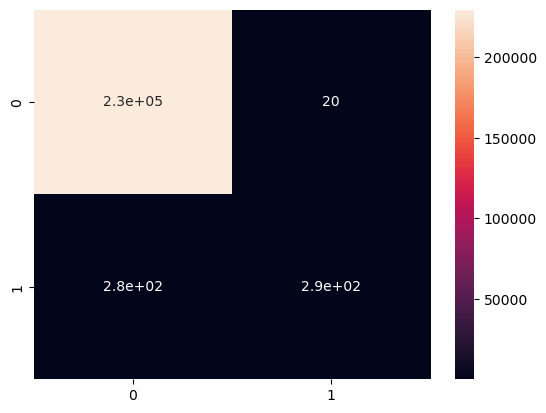

In [50]:
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_ann)
sns.heatmap(cm, annot=True)
plt.show()

In [51]:
print(classification_report(Y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229626
           1       0.94      0.51      0.66       571

    accuracy                           1.00    230197
   macro avg       0.97      0.76      0.83    230197
weighted avg       1.00      1.00      1.00    230197

